# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
url = "https://raw.githubusercontent.com/Keipatr/Healthcare-Analysis/main/healthcare_dataset.csv"
df = pd.read_csv(url)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [171]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [173]:
#describe numerical columns
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [174]:
# describe categorical column
df.describe(include='object').transpose()

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Date of Admission,10000,1815,2019-04-12,15
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Discharge Date,10000,1834,2021-11-28,14


In [175]:
# feature enginering
# change datatype to date
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# add column "days in hospital"
df["days in hospital"] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# take day month year from Date of Admission and Discharge Date as a features
df['Admission_Day'] = df['Date of Admission'].dt.day
df['Admission_Month'] = df['Date of Admission'].dt.month
df['Admission_Year'] = df['Date of Admission'].dt.year
df['Discharge_Day'] = df['Discharge Date'].dt.day
df['Discharge_Month'] = df['Discharge Date'].dt.month
df['Discharge_Year'] = df['Discharge Date'].dt.year

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Discharge Date,Medication,Test Results,days in hospital,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,...,2022-12-01,Aspirin,Inconclusive,14,17,11,2022,1,12,2022
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,2023-06-15,Lipitor,Normal,14,1,6,2023,15,6,2023
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,...,2019-02-08,Lipitor,Normal,30,9,1,2019,8,2,2019
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,2020-05-03,Penicillin,Abnormal,1,2,5,2020,3,5,2020
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,...,2021-08-02,Paracetamol,Normal,24,9,7,2021,2,8,2021


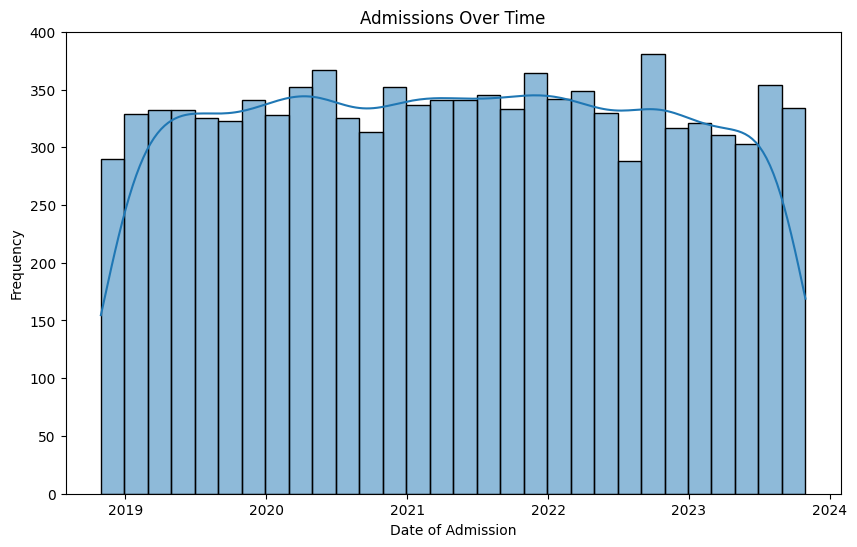

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Date of Admission'], bins=30, kde=True)
plt.title('Admissions Over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Frequency')
plt.show()


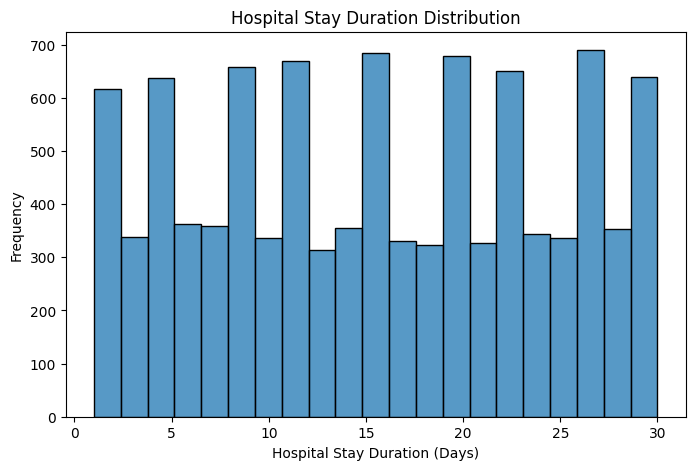

In [177]:
plt.figure(figsize=(8, 5))
sns.histplot(df['days in hospital'])
plt.title('Hospital Stay Duration Distribution')
plt.xlabel('Hospital Stay Duration (Days)')
plt.ylabel('Frequency')
plt.show()

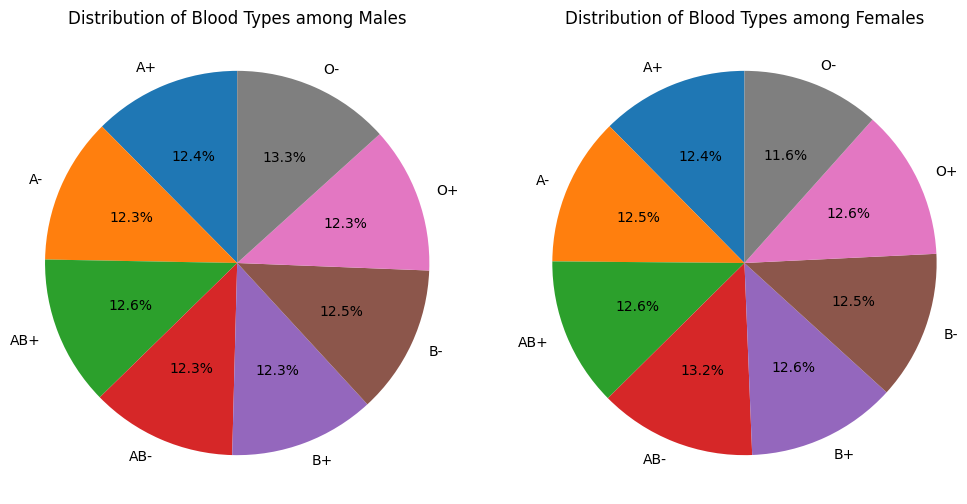

In [178]:
gender_bloodtype = df.groupby(['Gender', 'Blood Type']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(gender_bloodtype.loc['Male'], labels=gender_bloodtype.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Blood Types among Males')
axes[0].axis('equal')

axes[1].pie(gender_bloodtype.loc['Female'], labels=gender_bloodtype.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Blood Types among Females')
axes[1].axis('equal')

plt.show()

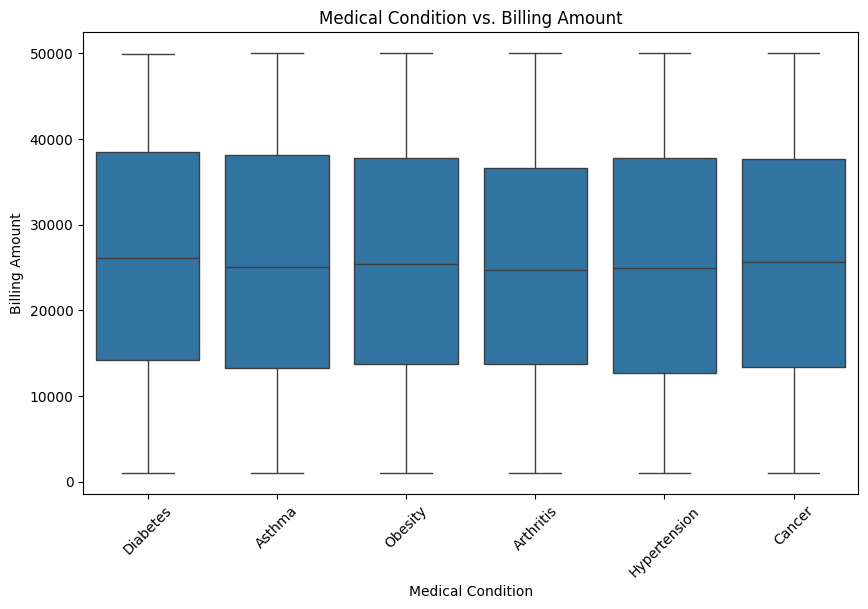

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Medical Condition vs. Billing Amount')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

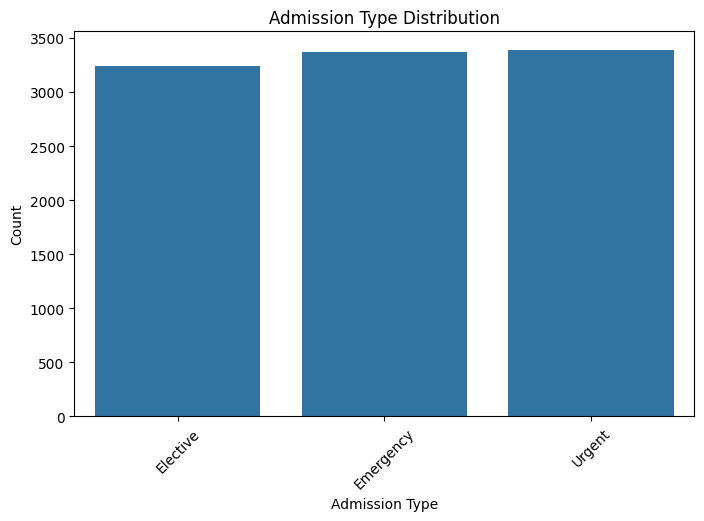

In [180]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


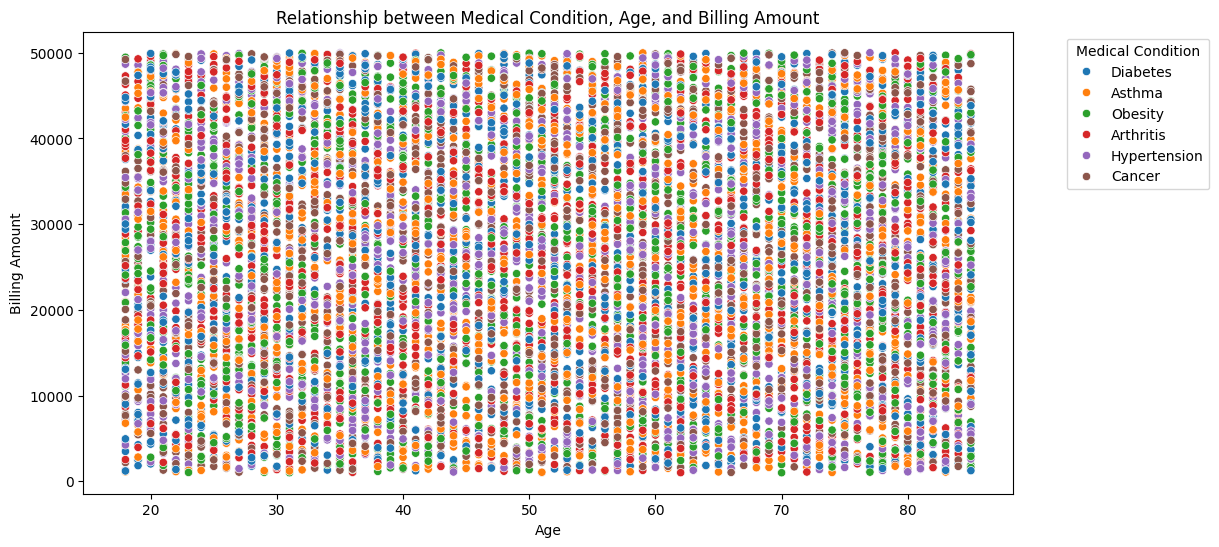

In [181]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Billing Amount', hue='Medical Condition', data=df)
plt.title('Relationship between Medical Condition, Age, and Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

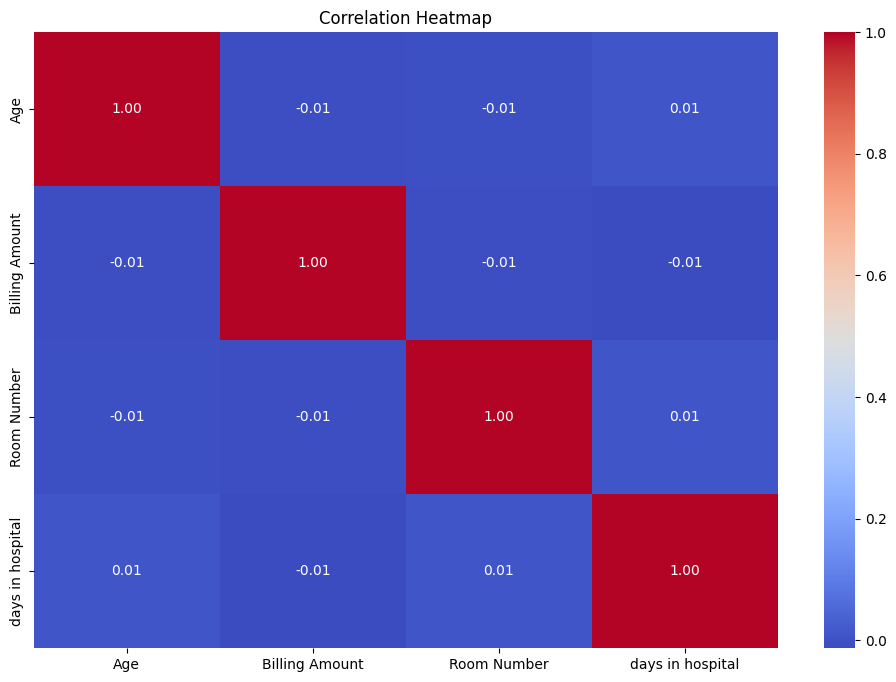

In [182]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [183]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = df.drop(["Name",'Date of Admission', 'Discharge Date'], axis=1)
df_encoded = df_encoded.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)

df_encoded.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,days in hospital,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,1,14,17,11,2022,1,12,2022
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,2,14,1,6,2023,15,6,2023
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,2,30,9,1,2019,8,2,2019
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,0,1,2,5,2020,3,5,2020
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,2,24,9,7,2021,2,8,2021


In [184]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled =  pd.DataFrame(scaler.fit_transform(df_encoded),columns = df_encoded.columns)
df_scaled.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,days in hospital,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year
0,1.508465,-0.985111,1.530606,0.301166,0.904522,1.444261,0.721952,0.851249,-1.330585,-1.246353,-1.424595,0.023057,-0.181360,0.139147,1.298232,0.807912,-1.656324,1.585102,0.784819
1,-0.839912,1.015114,1.093153,-0.874117,-0.779699,-1.348605,1.429679,1.548866,0.897390,-0.018298,-0.014663,1.242984,-0.181360,-1.665755,-0.151950,1.500448,-0.067110,-0.153902,1.482994
2,0.487431,1.015114,0.655699,1.476449,0.909313,1.458661,0.721952,0.807452,-0.069793,-0.018298,-0.014663,1.242984,1.676598,-0.763304,-1.602132,-1.269695,-0.861717,-1.313237,-1.309707
3,-0.125189,1.015114,0.655699,-0.874117,-1.305972,-0.746991,0.721952,-0.157358,1.553693,1.209757,1.395268,-1.196870,-1.690950,-1.552949,-0.441986,-0.577159,-1.429294,-0.443736,-0.611532
4,-0.023086,1.015114,1.530606,-1.461758,-0.714099,-0.176577,1.429679,-0.528235,1.527786,1.209757,0.690302,1.242984,0.979864,-0.763304,0.138086,0.115376,-1.542809,0.425766,0.086644


c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

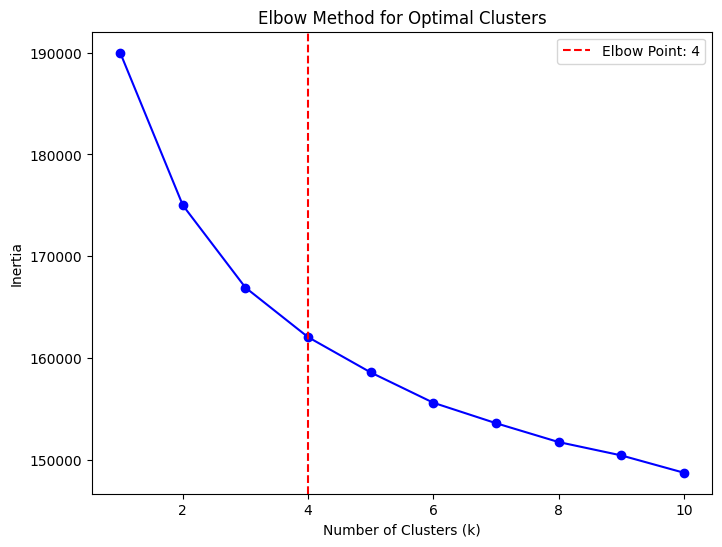

In [185]:
# clustering
# elbow method  
from kneed import KneeLocator
from sklearn.cluster import KMeans

k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

kneedle = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow Point: {elbow_point}')
plt.legend()
plt.show()

In [186]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df["Cluster"] = agg_clustering.fit_predict(df_scaled)
df.head()

c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Medication,Test Results,days in hospital,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year,Cluster
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,...,Aspirin,Inconclusive,14,17,11,2022,1,12,2022,3
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,Lipitor,Normal,14,1,6,2023,15,6,2023,3
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,...,Lipitor,Normal,30,9,1,2019,8,2,2019,0
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,Penicillin,Abnormal,1,2,5,2020,3,5,2020,0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,...,Paracetamol,Normal,24,9,7,2021,2,8,2021,3


In [187]:
aggregation_dict = {
    'Age': 'mean',
    'Gender': lambda x: x.mode().iloc[0],
    'Blood Type': lambda x: x.mode().iloc[0],
    'Medical Condition': lambda x: x.mode().iloc[0],
    'Hospital': lambda x: x.mode().iloc[0],
    'Insurance Provider': lambda x: x.mode().iloc[0],
    'Billing Amount': 'mean',
    'Admission Type': lambda x: x.mode().iloc[0],
    'Medication': lambda x: x.mode().iloc[0],
    'Test Results': lambda x: x.mode().iloc[0]
}

cluster_summary = df.groupby('Cluster').agg(aggregation_dict)

cluster_summary

,Age,Gender,Blood Type,Medical Condition,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
Cluster,,,,,,,,,,
0,50.733360,Female,A+,Cancer,Smith Inc,Cigna,25050.825376,Urgent,Lipitor,Abnormal
1,51.545312,Male,AB-,Diabetes,Smith PLC,Blue Cross,25217.980994,Urgent,Penicillin,Abnormal
2,52.353134,Male,AB-,Asthma,Thomas Group,Aetna,26008.807601,Urgent,Lipitor,Abnormal
3,51.044280,Female,O+,Asthma,Smith PLC,Cigna,25791.153383,Elective,Ibuprofen,Abnormal


In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_encoded = df.drop(["Name",'Date of Admission', 'Discharge Date','Cluster'], axis=1)
df_encoded = df_encoded.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)

df_encoded.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,days in hospital,Admission_Day,Admission_Month,Admission_Year,Discharge_Day,Discharge_Month,Discharge_Year
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,1,14,17,11,2022,1,12,2022
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,2,14,1,6,2023,15,6,2023
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,2,30,9,1,2019,8,2,2019
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,0,1,2,5,2020,3,5,2020
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,2,24,9,7,2021,2,8,2021


In [189]:
X = df_encoded.drop(['Test Results'], axis=1)
y = df_encoded['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy with Label Encoded : {accuracy:.4f}")
comparison_df.head()

Random Forest Accuracy with Label Encoded : 0.3290


,Actual,Predicted
6252,1,2
4684,2,0
1731,1,1
4742,1,0
4521,0,1
